In [1]:
%matplotlib inline
from matplotlib_venn import venn2
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob

In [2]:
edits_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/combined_outputs_w_cov_info/'
output_dir = '/home/bay001/projects/kris_apobec_20200121/permanent_data/final_analysis/01_SAILOR_bulk_rnaseq/outputs/epkm2'

In [3]:
rps2_0_file = os.path.join(edits_dir, 'RPS2-0_S4_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated')
rps2_50_file = os.path.join(edits_dir, 'RPS2-50_S11_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated')
rps2_1000_file = os.path.join(edits_dir, 'RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated')
apo_1000_file = os.path.join(edits_dir, 'ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated')
rbfox2_1000_file = os.path.join(edits_dir, 'RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.annotated')
counts_file = '/home/bay001/projects/kris_apobec_20200121/permanent_data/20191003_riboseq/featurecounts/counts.cds_only.txt'
polysome_file = '/home/rmarina/projects/apobec/revision_riboseq_comparison/ribosome_files/Polysome_RPKM_Raw.txt'

In [4]:
annotated_names = ['chrom','start','end','conf','cov','strand','geneid','genename','region','overlap']

edits = pd.read_csv(rps2_1000_file, sep='\t', names=annotated_names)
del edits['overlap']
edits.head()

,chrom,start,end,conf,cov,strand,geneid,genename,region
0,chr1,564720,564721,0.569601,"1,57",+,ENSG00000225972.1,MTND1P23,noncoding_exon
1,chr1,565115,565116,0.575355,"1,56",+,ENSG00000225630.1,MTND2P28,noncoding_exon
2,chr1,567190,567191,1.000000,"24,26",+,ENSG00000237973.1,hsa-mir-6723,noncoding_exon
3,chr1,567977,567978,0.922745,"1,9",+,ENSG00000237973.1,hsa-mir-6723,noncoding_exon
4,chr1,567996,567997,0.941480,"1,7",+,intergenic,intergenic,intergenic


In [5]:
# If we want to filter for conf first, this is where we do it
conf = 0.
print(edits.shape[0])
edits = edits[edits['conf'] >= conf]
print(edits.shape[0])

535897
535897


In [6]:
edits['region'].value_counts()

3utr                       261414
CDS                        206802
distintron500               16550
noncoding_exon              15782
proxintron500               12376
intergenic                  11162
5utr                         8575
distnoncoding_intron500      2246
proxnoncoding_intron500       944
miRNA                          34
gene                           12
Name: region, dtype: int64

# Filter for the regions we want to look at.

In [7]:
# region = 'CDS'
edits = edits[(edits['region']=='CDS') or (edits['region']=='3utr')]
print(edits.shape[0])

206802


# Get the number of reads that were edited (C>T conversion) summed across all genes

In [8]:
edits['edited_reads'] = edits['cov'].apply(lambda x: int(x.split(',')[0]))
edits = pd.DataFrame(edits.groupby('geneid')['edited_reads'].sum())
edits.head()

,edited_reads
geneid,
ENSG00000000003.10,93
ENSG00000000419.8,60
ENSG00000000457.9,2
ENSG00000000460.12,65
ENSG00000001036.9,146


# Read in read counts file

In [9]:
read_counts = pd.read_csv(counts_file, sep='\t', index_col=0, skiprows=1)
read_counts.head()

,Chr,Start,End,Strand,Length,results/ABCE1-0_S1_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/ABCE1-1000_S15_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/ABCE1-50_S8_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/ApoControl-0_S7_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,...,results/RBFOX2-0_S6_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.noRmDup.annotated.sorted.bam,results/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RBFOX2-50_S13_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RPS2-0_S4_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RPS2-50_S11_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RPS3-0_S5_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RPS3-1000_S19_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RPS3-50_S12_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000186092,chr1,69091,70005,+,915,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000237683,chr1,138533,139309,-,777,0,1,0,0,0,...,0,0,0,4,1,0,0,5,1,0
ENSG00000235249,chr1,367659,368594,+,936,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000185097,chr1,621099,622034,-,936,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000269831,chr1;chr1;chr1,738532;738788;739121,738618;738812;739137,-;-;-,129,0,0,0,0,2,...,0,2,2,0,0,0,0,1,0,0


In [10]:
for c in read_counts.columns:
    print(c)

Chr
Start
End
Strand
Length
results/ABCE1-0_S1_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
results/ABCE1-1000_S15_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
results/ABCE1-50_S8_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
results/ApoControl-0_S7_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
results/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
results/ApoControl-50_S14_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
results/ETF1-0_S2_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
results/ETF1-1000_S16_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
results/ETF1-50_S9_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
results/GSTP1-0_S3_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.S

In [11]:
sample_id = 'results/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'
# sample_id = 'results/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'
read_counts = read_counts[['Length', sample_id]]
read_counts.head()

,Length,results/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
Geneid,,
ENSG00000186092,915,0
ENSG00000237683,777,0
ENSG00000235249,936,0
ENSG00000185097,936,0
ENSG00000269831,129,0


# join the read counts with edit sums
- by "edit sums" it's not exactly 1:1 with each read, since each read will be counted multiple times for each edit found. We are, however, using mapped reads as a scaling factor. 

In [12]:
edits.reset_index(inplace=True)
edits['Geneid'] = edits['geneid'].apply(lambda x: x.split('.')[0])
edits.set_index('Geneid', inplace=True)
read_edit_counts = pd.merge(read_counts, edits[['edited_reads']], how='outer', left_index=True, right_index=True)
read_edit_counts.fillna(0, inplace=True)

# some genes aren't included in the counts matrix but are included in our edit annotations? odd. Maybe these genes have UTRs but no CDS?
read_edit_counts = read_edit_counts[read_edit_counts['Length']>0]
read_edit_counts.head()

,Length,results/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,edited_reads
Geneid,,,
ENSG00000000003,735.0,1994.0,93.0
ENSG00000000005,951.0,0.0,0.0
ENSG00000000419,885.0,1786.0,60.0
ENSG00000000457,2226.0,146.0,2.0
ENSG00000000460,2755.0,894.0,65.0


# calculate EPKM
- adding (ps)eudocount here

In [13]:
ps = 1 # min(polysome_rpkm_x3[polysome_rpkm_x3 > .0].min(axis=1).dropna())
print("(ps)eudocount value", ps)

(ps)eudocount value 1


In [14]:
# (# of Edited Counts (from SAILOR)) / ((total mapped read counts/10^6)*(Gene length/1000))

def epkm(row, total_mapped, colname):
    edit_counts = row[colname]
    return edit_counts/((total_mapped/1000000.)*(row['Length']/1000.))

total_mapped = read_edit_counts[sample_id].sum()
print(total_mapped)
read_edit_counts['epkm'] = read_edit_counts.apply(epkm, axis=1, args=(total_mapped, 'edited_reads'))
read_edit_counts['epkm+ps'] = read_edit_counts['epkm'] + ps
read_edit_counts.head()

23922381.0


,Length,results/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,edited_reads,epkm,epkm+ps
Geneid,,,,,
ENSG00000000003,735.0,1994.0,93.0,5.289215,6.289215
ENSG00000000005,951.0,0.0,0.0,0.000000,1.000000
ENSG00000000419,885.0,1786.0,60.0,2.834024,3.834024
ENSG00000000457,2226.0,146.0,2.0,0.037558,1.037558
ENSG00000000460,2755.0,894.0,65.0,0.986251,1.986251


# Basically copied from Ryan but added a pseudocount to make the log transformation easier

In [15]:
polysome_rpkm = pd.read_csv(polysome_file, sep='\t')
polysome_rpkm.reset_index(inplace=True)
polysome_rpkm['Geneid'] = polysome_rpkm.Geneid.apply(lambda x: x.split('.')[0])
polysome_rpkm.set_index('Geneid',inplace=True, drop=True)
polysome_rpkm_x3 = polysome_rpkm[['x3_input','x3_polysome']]

print("(ps)eudocount value", ps)
polysome_rpkm_x3 += ps
polysome_rpkm_x3.head()

(ps)eudocount value 1


,x3_input,x3_polysome
Geneid,,
ENSG00000262227,2.386483,1.000000
ENSG00000273243,2.615120,1.000000
ENSG00000254207,2.450542,1.215213
ENSG00000230359,2.473046,1.542613
ENSG00000105880,2.390836,1.430654


In [16]:
# now get list of polysome data
# Only going to test on X3, but X2 could also work
polysome_rpkm_x3['poly/input'] = (polysome_rpkm_x3['x3_polysome']) / (polysome_rpkm_x3['x3_input'])
polysome_rpkm_x3.head()

/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,x3_input,x3_polysome,poly/input
Geneid,,,
ENSG00000262227,2.386483,1.000000,0.419027
ENSG00000273243,2.615120,1.000000,0.382392
ENSG00000254207,2.450542,1.215213,0.495896
ENSG00000230359,2.473046,1.542613,0.623770
ENSG00000105880,2.390836,1.430654,0.598391


# lots of genes that were edited but maybe not protein coding? Or maybe Fred's data is filtered? Check this.

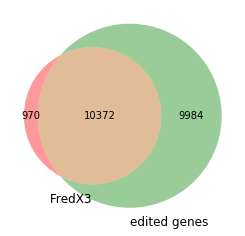

In [17]:
venn2([set(polysome_rpkm_x3.index), set(read_edit_counts.index)], ['FredX3', 'edited genes'])

# merge epkm and polysome and plot scatter
- use inner join because we just care about the 10k genes we can make the comparisons with.

In [18]:
read_edit_polysome = pd.merge(read_edit_counts, polysome_rpkm_x3, how='inner', left_index=True, right_index=True)
read_edit_polysome.head()

,Length,results/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,edited_reads,epkm,epkm+ps,x3_input,x3_polysome,poly/input
Geneid,,,,,,,,
ENSG00000000003,735.0,1994.0,93.0,5.289215,6.289215,33.412616,92.860482,2.779204
ENSG00000000419,885.0,1786.0,60.0,2.834024,3.834024,63.771277,218.714026,3.429664
ENSG00000000457,2226.0,146.0,2.0,0.037558,1.037558,3.335964,4.184759,1.254438
ENSG00000000460,2755.0,894.0,65.0,0.986251,1.986251,8.421299,15.834489,1.880291
ENSG00000001036,1428.0,3771.0,146.0,4.273860,5.273860,39.767070,47.770120,1.201248


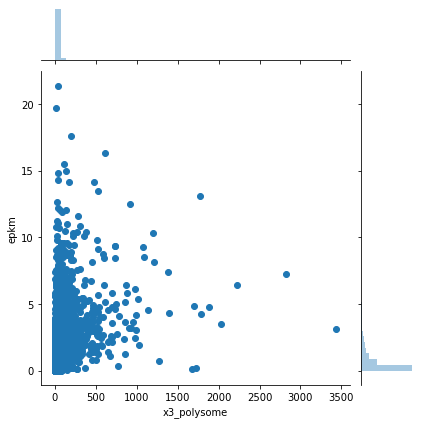

In [19]:
sns.jointplot(
    x='x3_polysome',
    y='epkm',
    data=read_edit_polysome
)

# log2 poly rpkm vs log2 epkm

/projects/ps-yeolab4/software/yeolabconda3/envs/python3essential-0.0.1/lib/python3.6/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


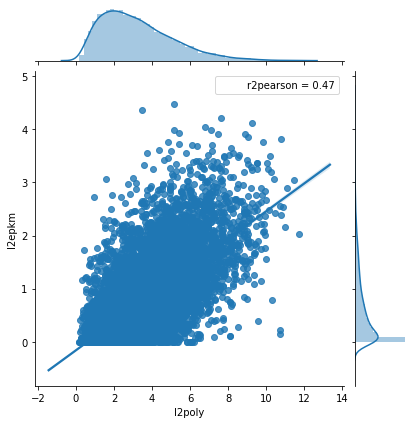

In [20]:
read_edit_polysome['l2epkm'] = np.log2(read_edit_polysome['epkm+ps'])
read_edit_polysome['l2poly/input'] = np.log2(read_edit_polysome['poly/input'])
read_edit_polysome['l2poly'] = np.log2(read_edit_polysome['x3_polysome'])

def r2pearson(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot(
    x='l2poly',
    y='l2epkm',
    data=read_edit_polysome,
    kind='reg',
    stat_func=r2pearson
)


# log2 poly rpkm/input vs log2 epkm

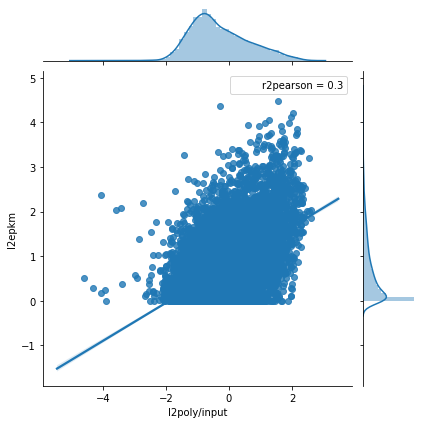

In [21]:
sns.jointplot(
    x='l2poly/input',
    y='l2epkm',
    data=read_edit_polysome,
    kind='reg',
    stat_func=r2pearson
)


# Just to check - maybe using rps-0 or Apo-1000 as an input?
- re-do the steps using rps2-0 (rps2_0_file) or ApoControl-0 (apo_1000_file)

In [22]:
annotated_names = ['chrom','start','end','conf','cov','strand','geneid','genename','region','overlap']
# sample_id = 'results/RPS2-0_S4_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'
sample_id = 'results/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam'

edits = pd.read_csv(apo_1000_file, sep='\t', names=annotated_names)
del edits['overlap']
edits.head()

,chrom,start,end,conf,cov,strand,geneid,genename,region
0,chr1,324297,324298,0.994820,"2,12",+,ENSG00000237094.7,RP4-669L17.10,noncoding_exon
1,chr1,327518,327519,0.950990,"1,6",+,ENSG00000250575.1,RP4-669L17.8,noncoding_exon
2,chr1,327779,327780,0.877521,"1,14",+,"ENSG00000237094.7,ENSG00000250575.1","RP4-669L17.10,RP4-669L17.8",noncoding_exon
3,chr1,564568,564569,0.950990,"1,6",+,ENSG00000225972.1,MTND1P23,noncoding_exon
4,chr1,566730,566731,0.913517,"1,10",+,ENSG00000237973.1,hsa-mir-6723,noncoding_exon


In [23]:
# If we want to filter for conf first, this is where we do it
print(edits.shape[0])
edits = edits[edits['conf'] >= conf]
print(edits.shape[0])

66380
66380


In [24]:
# Filter for the regions we want to look at.
edits = edits[edits['region']==region]
print(edits.shape[0])
edits.head()

22076


,chrom,start,end,conf,cov,strand,geneid,genename,region
13,chr1,879131,879132,0.851458,"1,17",+,ENSG00000187634.6,SAMD11,CDS
14,chr1,879380,879381,0.777821,"1,26",+,ENSG00000187634.6,SAMD11,CDS
15,chr1,879395,879396,0.793614,"1,24",+,ENSG00000187634.6,SAMD11,CDS
17,chr1,897127,897128,0.793614,"1,24",+,ENSG00000187961.9,KLHL17,CDS
18,chr1,897327,897328,0.877521,"1,14",+,ENSG00000187961.9,KLHL17,CDS


In [25]:
# Get the number of reads that were edited (C>T conversion) summed across all genes
edits['edited_reads'] = edits['cov'].apply(lambda x: int(x.split(',')[0]))
edits = pd.DataFrame(edits.groupby('geneid')['edited_reads'].sum())
edits.columns = ['bg_edited_reads']
edits.head()

,bg_edited_reads
geneid,
ENSG00000000003.10,1
ENSG00000000419.8,2
ENSG00000000460.12,4
ENSG00000001036.9,9
ENSG00000001167.10,2


In [26]:
# Read in counts file and join with summed edits as counts
read_counts = pd.read_csv(counts_file, sep='\t', index_col=0, skiprows=1)
read_counts.head()

,Chr,Start,End,Strand,Length,results/ABCE1-0_S1_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/ABCE1-1000_S15_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/ABCE1-50_S8_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/ApoControl-0_S7_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,...,results/RBFOX2-0_S6_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted_a0_b0_e0.01.noRmDup.annotated.sorted.bam,results/RBFOX2-1000_S20_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RBFOX2-50_S13_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RPS2-0_S4_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RPS2-50_S11_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RPS3-0_S5_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RPS3-1000_S19_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,results/RPS3-50_S12_L001_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
Geneid,,,,,,,,,,,,,,,,,,,,,
ENSG00000186092,chr1,69091,70005,+,915,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000237683,chr1,138533,139309,-,777,0,1,0,0,0,...,0,0,0,4,1,0,0,5,1,0
ENSG00000235249,chr1,367659,368594,+,936,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000185097,chr1,621099,622034,-,936,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000269831,chr1;chr1;chr1,738532;738788;739121,738618;738812;739137,-;-;-,129,0,0,0,0,2,...,0,2,2,0,0,0,0,1,0,0


In [27]:
read_counts = read_counts[['Length', sample_id]]
read_counts.head()

,Length,results/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam
Geneid,,
ENSG00000186092,915,0
ENSG00000237683,777,0
ENSG00000235249,936,0
ENSG00000185097,936,0
ENSG00000269831,129,2


In [28]:
# join with edits
edits.reset_index(inplace=True)
edits['Geneid'] = edits['geneid'].apply(lambda x: x.split('.')[0])
edits.set_index('Geneid', inplace=True)
read_edit_counts = pd.merge(read_counts, edits[['bg_edited_reads']], how='outer', left_index=True, right_index=True)
read_edit_counts.fillna(0, inplace=True)

# some genes aren't included in the counts matrix but are included in our edit annotations? odd. Maybe some genes lack CDS, which we wouldn't care about.
read_edit_counts = read_edit_counts[read_edit_counts['Length']>0]
read_edit_counts.head()

,Length,results/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,bg_edited_reads
Geneid,,,
ENSG00000000003,735.0,1700.0,1.0
ENSG00000000005,951.0,10.0,0.0
ENSG00000000419,885.0,1632.0,2.0
ENSG00000000457,2226.0,211.0,0.0
ENSG00000000460,2755.0,819.0,4.0


In [29]:
total_counts = read_edit_counts[sample_id].sum()
print(total_counts)
read_edit_counts['input'] = read_edit_counts.apply(epkm, axis=1, args=(total_counts, 'bg_edited_reads'))
read_edit_counts.head()

23204253.0


,Length,results/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,bg_edited_reads,input
Geneid,,,,
ENSG00000000003,735.0,1700.0,1.0,0.058633
ENSG00000000005,951.0,10.0,0.0,0.000000
ENSG00000000419,885.0,1632.0,2.0,0.097391
ENSG00000000457,2226.0,211.0,0.0,0.000000
ENSG00000000460,2755.0,819.0,4.0,0.062571


# merge bg edits with the main dataframe

In [30]:
del read_edit_counts['Length'] # redundant
merged = pd.merge(read_edit_polysome, read_edit_counts, how='inner', left_index=True, right_index=True)
merged.sort_values(inplace=True, by='epkm')
merged.head()

,Length,results/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,edited_reads,epkm,epkm+ps,x3_input,x3_polysome,poly/input,l2epkm,l2poly/input,l2poly,results/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,bg_edited_reads,input
Geneid,,,,,,,,,,,,,,
ENSG00000272658,1167.0,1.0,0.0,0.0,1.0,2.717162,1.329920,0.489452,0.0,-1.030762,0.411339,11.0,0.0,0.0
ENSG00000179403,1455.0,23.0,0.0,0.0,1.0,3.368025,2.758929,0.819154,0.0,-0.287794,1.464109,78.0,0.0,0.0
ENSG00000205808,885.0,27.0,0.0,0.0,1.0,7.099481,3.964840,0.558469,0.0,-0.840451,1.987263,36.0,0.0,0.0
ENSG00000205927,969.0,16.0,0.0,0.0,1.0,2.316176,1.791256,0.773368,0.0,-0.370773,0.840972,33.0,0.0,0.0
ENSG00000179314,1804.0,174.0,0.0,0.0,1.0,5.609620,2.901992,0.517324,0.0,-0.950859,1.537044,233.0,0.0,0.0


In [31]:
ps = 1 # min(merged[['rps2-0-epkm', 'epkm']][merged[['rps2-0-epkm', 'epkm']] > .0].min(axis=1).dropna())
print("pseudocount value", ps)
merged['epkm/input'] = (merged['epkm'] + ps)/(merged['input'] + ps)
merged['l2epkm/input'] = np.log2(merged['epkm/input'])
merged.head()

pseudocount value 1


,Length,results/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,edited_reads,epkm,epkm+ps,x3_input,x3_polysome,poly/input,l2epkm,l2poly/input,l2poly,results/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,bg_edited_reads,input,epkm/input,l2epkm/input
Geneid,,,,,,,,,,,,,,,,
ENSG00000272658,1167.0,1.0,0.0,0.0,1.0,2.717162,1.329920,0.489452,0.0,-1.030762,0.411339,11.0,0.0,0.0,1.0,0.0
ENSG00000179403,1455.0,23.0,0.0,0.0,1.0,3.368025,2.758929,0.819154,0.0,-0.287794,1.464109,78.0,0.0,0.0,1.0,0.0
ENSG00000205808,885.0,27.0,0.0,0.0,1.0,7.099481,3.964840,0.558469,0.0,-0.840451,1.987263,36.0,0.0,0.0,1.0,0.0
ENSG00000205927,969.0,16.0,0.0,0.0,1.0,2.316176,1.791256,0.773368,0.0,-0.370773,0.840972,33.0,0.0,0.0,1.0,0.0
ENSG00000179314,1804.0,174.0,0.0,0.0,1.0,5.609620,2.901992,0.517324,0.0,-0.950859,1.537044,233.0,0.0,0.0,1.0,0.0


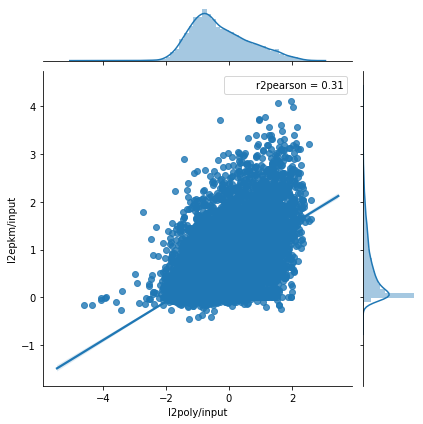

In [32]:
sns.jointplot(
    x='l2poly/input',
    y='l2epkm/input',
    data=merged,
    kind='reg',
    stat_func=r2pearson
)

In [33]:
merged

,Length,results/RPS2-1000_S18_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,edited_reads,epkm,epkm+ps,x3_input,x3_polysome,poly/input,l2epkm,l2poly/input,l2poly,results/ApoControl-1000_S21_L002_R1_001.fastqTr.sorted.STARUnmapped.out.sorted.STARAligned.out.sorted.bam,bg_edited_reads,input,epkm/input,l2epkm/input
Geneid,,,,,,,,,,,,,,,,
ENSG00000272658,1167.0,1.0,0.0,0.000000,1.000000,2.717162,1.329920,0.489452,0.000000,-1.030762,0.411339,11.0,0.0,0.000000,1.000000,0.000000
ENSG00000179403,1455.0,23.0,0.0,0.000000,1.000000,3.368025,2.758929,0.819154,0.000000,-0.287794,1.464109,78.0,0.0,0.000000,1.000000,0.000000
ENSG00000205808,885.0,27.0,0.0,0.000000,1.000000,7.099481,3.964840,0.558469,0.000000,-0.840451,1.987263,36.0,0.0,0.000000,1.000000,0.000000
ENSG00000205927,969.0,16.0,0.0,0.000000,1.000000,2.316176,1.791256,0.773368,0.000000,-0.370773,0.840972,33.0,0.0,0.000000,1.000000,0.000000
ENSG00000179314,1804.0,174.0,0.0,0.000000,1.000000,5.609620,2.901992,0.517324,0.000000,-0.950859,1.537044,233.0,0.0,0.000000,1.000000,0.000000
ENSG00000134461,1083.0,67.0,0.0,0.000000,1.000000,5.064504,3.445512,0.680326,0.000000,-0.555703,1.784718,112.0,0.0,0.000000,1.000000,0.000000
ENSG00000179294,1137.0,24.0,0.0,0.000000,1.000000,12.280542,4.392997,0.357720,0.000000,-1.483097,2.135206,55.0,0.0,0.000000,1.000000,0.000000
ENSG00000134533,715.0,18.0,0.0,0.000000,1.000000,2.814776,4.828180,1.715298,0.000000,0.778459,2.271480,3.0,0.0,0.000000,1.000000,0.000000
ENSG00000205978,5694.0,96.0,0.0,0.000000,1.000000,5.328741,2.171216,0.407454,0.000000,-1.295291,1.118503,255.0,1.0,0.007569,0.992488,-0.010878


# Save outputs

In [34]:
merged.to_csv(os.path.join(output_dir, 'rps2-1000-new-epkm.txt'), sep='\t')